In [1]:
import pandas as pd

df = pd.read_csv('./weatherHistory.csv')
df.head(2)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.


In [4]:
df.describe(include=['O'])


,Formatted Date,Summary,Precip Type,Daily Summary
count,96453,96453,95936,96453
unique,96429,27,2,214
top,2010-08-02 03:00:00.000 +0200,Partly Cloudy,rain,Mostly cloudy throughout the day.
freq,2,31733,85224,20085


In [5]:
df.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


In [11]:
data_set = df.iloc[:,[0,3,4,5,8]]
data_set.corr()

,Temperature (C),Apparent Temperature (C),Humidity,Visibility (km)
Temperature (C),1.000000,0.992629,-0.632255,0.392847
Apparent Temperature (C),0.992629,1.000000,-0.602571,0.381718
Humidity,-0.632255,-0.602571,1.000000,-0.369173
Visibility (km),0.392847,0.381718,-0.369173,1.000000


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

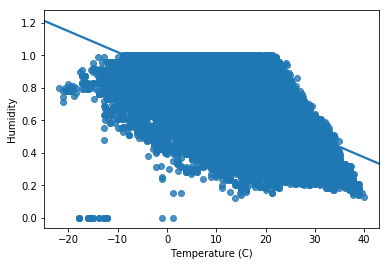

In [14]:
sns.regplot(x=data_set["Temperature (C)"], y=data_set["Humidity"])

In [15]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers
outlier_data = detect_outlier(data_set["Humidity"])
print (outlier_data)

[0.14, 0.14, 0.14, 0.13, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.12, 0.14]


In [16]:
data_set_clean = data_set[data_set["Humidity"]>0.15]

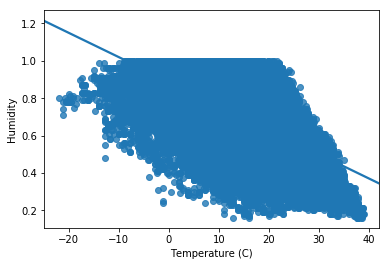

In [17]:
sns.regplot(x=data_set_clean["Temperature (C)"], y=data_set_clean["Humidity"])

In [18]:
y= data_set_clean.iloc[:,[1]]
X= data_set_clean.iloc[:,[2,3]]
X.head()

,Apparent Temperature (C),Humidity
0,7.388889,0.89
1,7.227778,0.86
2,9.377778,0.89
3,5.944444,0.83
4,6.977778,0.83


In [19]:
y.head()

,Temperature (C)
0,9.472222
1,9.355556
2,9.377778
3,8.288889
4,8.755556


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.linear_model import LinearRegression
regressor =LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [23]:
regressor.coef_

array([[ 0.85716489, -2.64871695]])

In [24]:
regressor.intercept_

array([4.57532511])

In [25]:
y_pred = regressor.predict(X_test)

In [26]:
regressor.score(X,y)

0.9871695930086188

In [27]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.0869884738697586
